Análisis de datos 
Laboratorio Avanzado II 
Estudiante: Esteban Vinicio Soto Monge


Fecha 20230619

In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#Main path location (The folder in which all measurements are saved)
main_path = r"C:\Users\esteb\electrochromicfilms\Edgar"

## 20230619

###  wo3_film_continuous_electrodeposition_A

In [2]:
current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230619\20230619\electrodeposition_WO3_thin_films_onto_ITO_A\wo3_film_continuous_electrodeposition_A"
OCP_1_filename = os.path.join(current_folder,  r"OCP_1")
CA_2_filename =  os.path.join(current_folder, r"CA_2")
OCP_3_filename = os.path.join(current_folder,  r"OCP_3")

##### OCP 1

In [3]:
ocp_1_df = pd.read_csv(OCP_1_filename, sep = "\t")
ocp_1_df

,Time (s),OCP value (V)
0,10.935907,0.395294
1,11.935907,NaN
2,12.935907,NaN
3,13.935907,NaN
4,14.935907,NaN
5,15.935907,NaN
6,16.935907,NaN
7,17.935907,NaN
8,18.935907,NaN
9,19.935907,NaN


In [4]:

#defines aliases for the column names
short_columns = ["time", "potential"]
aliases_columns_tuple = zip(short_columns, ocp_1_df.columns)
aliases_columns = dict(aliases_columns_tuple)
aliases_columns

axis_labels = ["Time (s)", "Potential (V)"]
aliases_axis = dict(zip(short_columns, axis_labels))
aliases_axis

{'time': 'Time (s)', 'potential': 'Potential (V)'}

In [5]:
#print OCP_1
def makeplot(x, y, aliases_columns, aliases_axis, df): 
    #plots the x and y aliases with their respective labels
    df.plot(aliases_columns[x], aliases_columns[y], grid = "True")
    plt.xlabel(aliases_axis[x])
    plt.ylabel(aliases_axis[y])
    plt.show()


##### Chronoamperometry

In [6]:
ca_2_df = pd.read_csv(CA_2_filename, sep = "\t")
current_df = ca_2_df
current_df

,Time (s),WE(1).Current (A),WE(1).Potential (V)
0,72.061754,-0.001703,-0.699646
1,72.161754,-0.001653,-0.698975
2,72.261754,-0.001664,-0.699219
3,72.361754,-0.001692,-0.699036
4,72.461754,-0.001723,-0.698914
...,...,...,...
3495,421.561753,-0.004766,-0.699402
3496,421.661753,-0.004766,-0.699188
3497,421.761753,-0.004766,-0.699493
3498,421.861753,-0.004766,-0.699310


In [7]:
#defines aliases for the column names
short_columns = ["time", "current", "potential"]
aliases_columns = dict(zip(short_columns, current_df.columns))
aliases_columns

axis_labels = ["Time (s)", "Current (A)", "Potential (V)"]
aliases_axis = dict(zip(short_columns, axis_labels))
print(f"{aliases_axis=}\n{aliases_columns =}")

aliases_axis={'time': 'Time (s)', 'current': 'Current (A)', 'potential': 'Potential (V)'}
aliases_columns ={'time': 'Time (s)', 'current': 'WE(1).Current (A)', 'potential': 'WE(1).Potential (V)'}


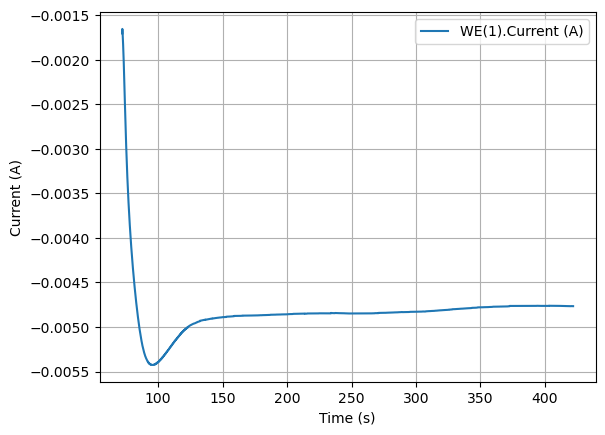

In [8]:
#CA_2 plot
x = "time"
y = "current"
makeplot(x, y,aliases_columns, aliases_axis, current_df)

In [9]:
#potential vs current


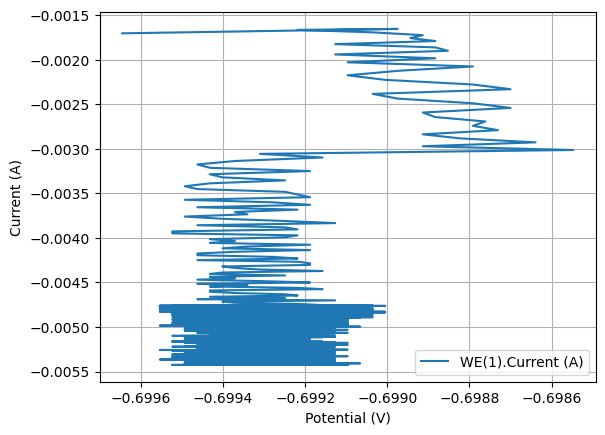

In [10]:
#CA_2 plot
x = "potential"
y = "current"
makeplot(x, y,aliases_columns, aliases_axis, ca_2_df)

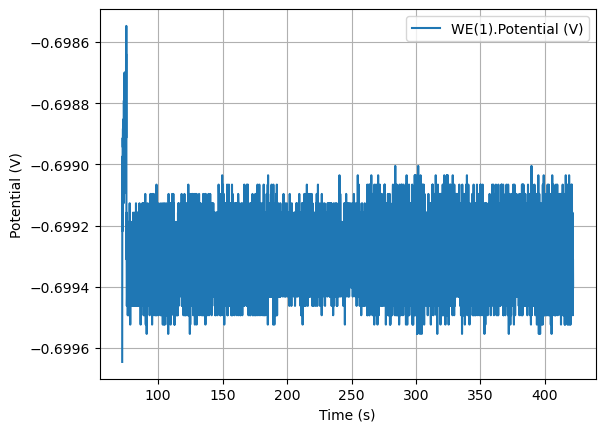

In [11]:
#CA_2 plot
x = "time"
y = "potential"
makeplot(x, y,aliases_columns, aliases_axis, ca_2_df)

In [12]:
##### OCP 3 
ocp_1_df = pd.read_csv(OCP_1_filename, sep = "\t")
ocp_1_df


,Time (s),OCP value (V)
0,10.935907,0.395294
1,11.935907,NaN
2,12.935907,NaN
3,13.935907,NaN
4,14.935907,NaN
5,15.935907,NaN
6,16.935907,NaN
7,17.935907,NaN
8,18.935907,NaN
9,19.935907,NaN


In [13]:
#### wo3_film_continuous_electrodeposition_B
def wo3_film_continuous_electrodeposition_B_0230619():

    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230619\20230619\electrodeposition_WO3_thin_films_onto_ITO_A\wo3_film_continuous_electrodeposition_B"
    CA_2_file = os.path.join(current_folder, "CA_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    column_names_CA = ["time", "current", "voltage"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CA_2_df = pd.read_csv(CA_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CA_2_df["current"] = CA_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2


    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CA_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CA_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


         time   voltage
0    5.534806  0.329102
1    6.534806  0.329407
2    7.534806  0.329681
3    8.534806  0.329987
4    9.534806  0.330261
5   10.534806  0.330536
6   11.534806  0.330841
7   12.534806  0.331085
8   13.534806  0.331390
9   14.534806  0.331665
10  15.534806  0.331848
11  16.534806  0.332184
12  17.534806  0.332489
13  18.534806  0.332703
14  19.534806  0.333038
15  20.534806  0.333374
16  21.534806  0.333679
17  22.534806  0.334015
18  23.534806  0.334320
19  24.534806  0.334625
20  25.534806  0.334930
21  26.534806  0.335205
22  27.534806  0.335510
23  28.534806  0.335815
24  29.534806  0.336121
25  30.534806  0.336395
26  31.534806  0.336578
27  32.534806  0.336945
28  33.534806  0.337250
29  34.534806  0.337524
30  35.534806  0.337799
31  36.534806  0.338074
32  37.534806  0.338348
33  38.534806  0.338623
34  39.534806  0.338898
35  40.534806  0.339203
36  41.534806  0.339447
37  42.534806  0.339722
38  43.534806  0.339966
39  44.534806  0.340240
40  45.534806  0

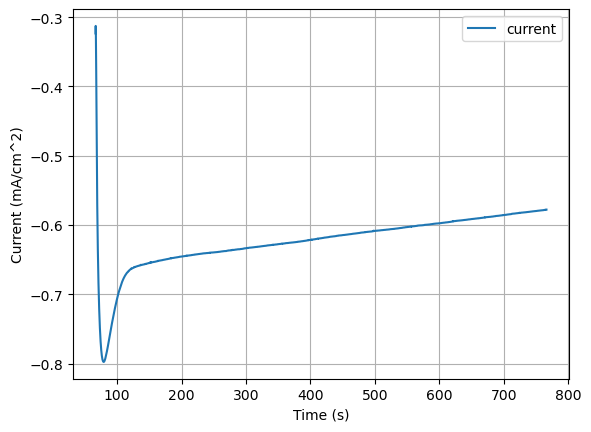

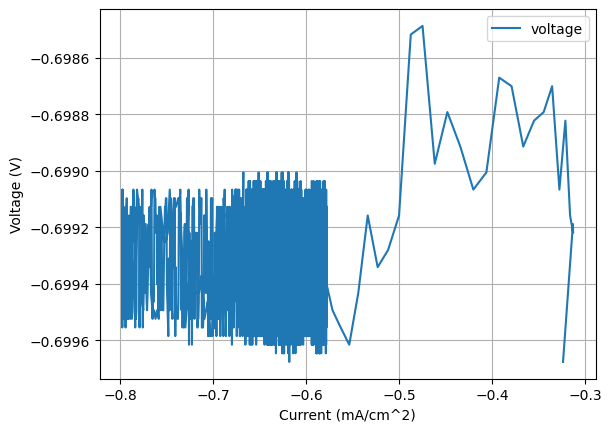

In [14]:
wo3_film_continuous_electrodeposition_B_0230619()

## 20230626

### electrodeposition_prussian_blue

#### electrodeposition_sample_B

In [15]:
def electrodeposition_prussian_blue_electrodeposition_sample_B_20230626():

    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230626\20230626\electrodeposition_prussian_blue\electrodeposition_sample_B"
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CP_data_2_file = os.path.join(current_folder, "CP_data_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CP_data_2_df = pd.read_csv(CP_data_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CP_data_2_df["current"] = CP_data_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CP_data_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CP_data_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


        time   voltage
0  10.985926  1.052856
1  11.085926  1.052856
2  11.185926  1.052856
3  11.285926  1.052856
4  11.385926  1.052856
5  11.485926  1.052856
6  11.585926  1.052856
7  11.685926  1.052856
8  11.785926  1.052856
           time   voltage
0    164.609751  1.325684
1    165.609751  1.292419
2    166.609751  1.274719
3    167.609751  1.262817
4    168.609751  1.254272
..          ...       ...
295  459.609750  1.093750
296  460.609750  1.093750
297  461.609750  1.093750
298  462.609750  1.093445
299  463.609750  1.093445

[300 rows x 2 columns]


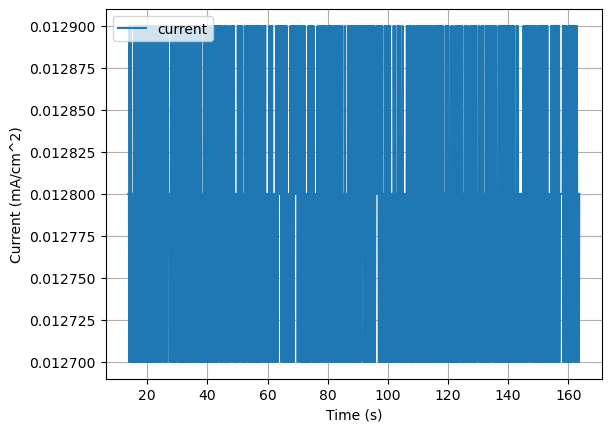

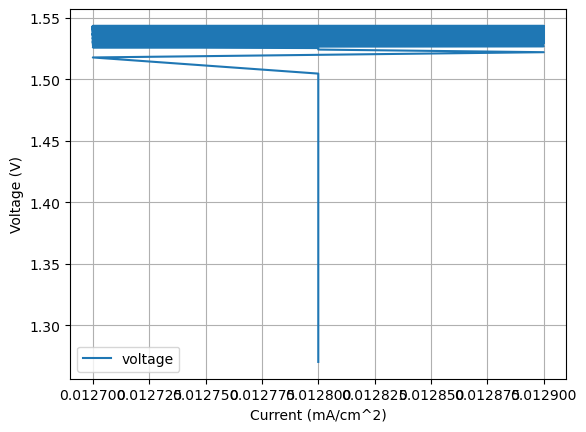

In [16]:
electrodeposition_prussian_blue_electrodeposition_sample_B_20230626()

In [17]:
#### electrodeposition_sample_D

In [18]:
def electrodeposition_prussian_blue_electrodeposition_sample_D_20230626():

    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230626\20230626\electrodeposition_prussian_blue\electrodeposition_sample_D"
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CP_data_2_file = os.path.join(current_folder, "CP_data_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CP_data_2_df = pd.read_csv(CP_data_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CP_data_2_df["current"] = CP_data_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CP_data_2_df.plot.scatter(x, y, grid =True)
    plt.title("File CP_data_2")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CP_data_2_df.plot.scatter(x, y, grid =True)
    plt.title("File CP_data_2")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


          time   voltage
0     9.095882  0.737610
1     9.195882  0.737610
2     9.295882  0.737915
3     9.395882  0.738220
4     9.495882  0.738220
..         ...       ...
595  68.595882  0.788574
596  68.695882  0.788879
597  68.795882  0.788879
598  68.895882  0.788879
599  68.995882  0.788879

[600 rows x 2 columns]
          time   voltage
0   222.193785  0.767517
1   223.193785  0.769958
2   224.193785  0.770264
3   225.193785  0.770874
4   226.193785  0.771179
5   227.193785  0.771179
6   228.193785  0.771484
7   229.193785  0.771790
8   230.193785  0.772095
9   231.193785  0.772095
10  232.193785  0.772400
11  233.193785  0.772705
12  234.193785  0.772705
13  235.193785  0.773010
14  236.193785  0.773010
15  237.193785  0.773315
16  238.193785  0.773315
17  239.193785  0.773315
18  240.193785  0.773621
19  241.193785  0.773621
20  242.193785  0.773926
21  243.193785  0.773926
22  244.193785  0.773926
23  245.193785  0.773926
24  246.193785  0.774231
25  247.193785  0.774231
2

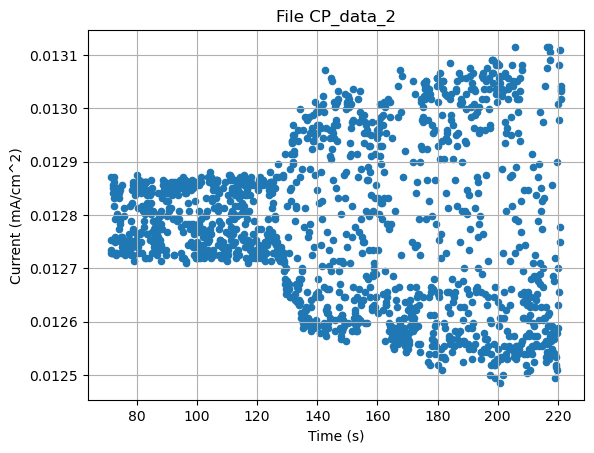

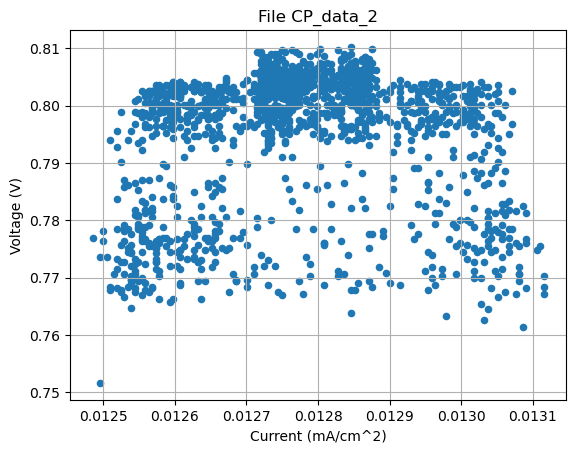

In [19]:
electrodeposition_prussian_blue_electrodeposition_sample_D_20230626()

## 20230810

### WO3_ITO_20230717_G

In [20]:
def WO3_ITO_20230717_G_analysis():

    date = "20230810"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230810 (1)\WO3_ITO_20230717_G"
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CA_2_file = os.path.join(current_folder, "CA_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CA_2_df = pd.read_csv(CA_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CA_2_df["current"] = CA_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2 Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


        time   voltage
0    3.14623  0.501099
1    4.14623  0.502625
2    5.14623  0.504150
3    6.14623  0.505371
4    7.14623  0.506897
5    8.14623  0.508118
6    9.14623  0.509338
7   10.14623  0.510559
8   11.14623  0.511780
9   12.14623  0.513000
10  13.14623  0.514221
11  14.14623  0.515442
12  15.14623  0.516663
13  16.14623  0.517883
14  17.14623  0.519104
15  18.14623  0.520020
16  19.14623  0.520630
17  20.14623  0.521851
18  21.14623  0.522766
19  22.14623  0.523682
20  23.14623  0.524597
21  24.14623  0.525208
22  25.14623  0.526123
23  26.14623  0.527344
24  27.14623  0.528259
25  28.14623  0.529175
26  29.14623  0.529785
27  30.14623  0.530701
28  31.14623  0.531616
29  32.14623  0.532532
           time   voltage
0    335.324099 -0.583191
1    336.324099 -0.552673
2    337.324099 -0.531311
3    338.324099 -0.513916
4    339.324099 -0.499023
..          ...       ...
415  750.324098  0.166534
416  751.324098  0.166656
417  752.324098  0.166809
418  753.324098  0.166931
4

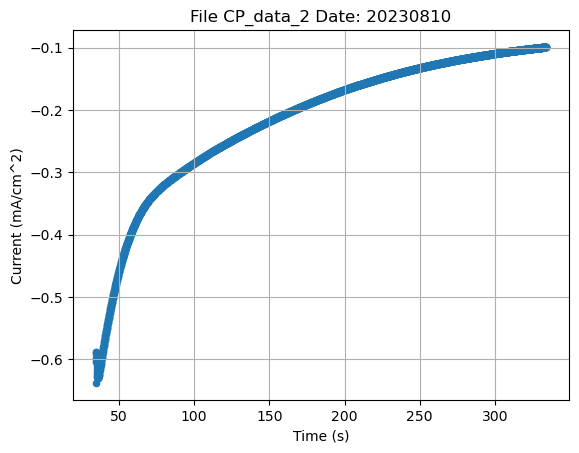

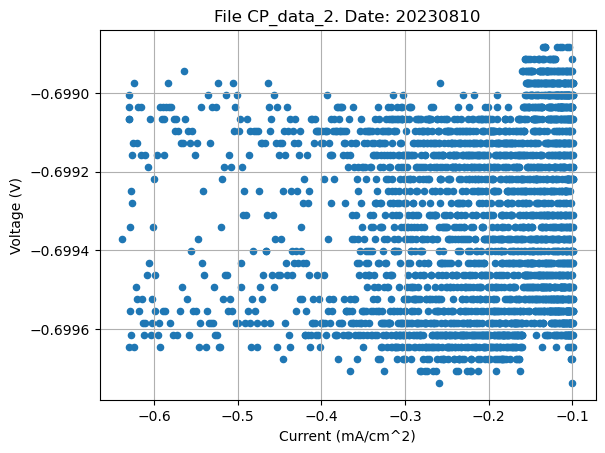

In [21]:
WO3_ITO_20230717_G_analysis()

In [22]:
def WO3_ITO_20230717_H_analysis():
    date = "20230810"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230810 (1)\WO3_ITO_20230717_H"
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CA_2_file = os.path.join(current_folder, "CA_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CA_2_df = pd.read_csv(CA_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CA_2_df["current"] = CA_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "voltage"
    y = "current"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()

         time   voltage
0    9.563882  0.597229
1   10.563882  0.597229
2   11.563882  0.597229
3   12.563882  0.597229
4   13.563882  0.597534
5   14.563882  0.597534
6   15.563882  0.597534
7   16.563882  0.597534
8   17.563882  0.597229
9   18.563882  0.597229
10  19.563882  0.597229
11  20.563882  0.597229
12  21.563882  0.597229
13  22.563882  0.596924
14  23.563882  0.596619
15  24.563882  0.595398
16  25.563882  0.595398
17  26.563882  0.595093
18  27.563882  0.595093
19  28.563882  0.595093
20  29.563882  0.595093
21  30.563882  0.594788
22  31.563882  0.594788
23  32.563882  0.594482
24  33.563882  0.594482
25  34.563882  0.594482
26  35.563882  0.594482
27  36.563882  0.594177
28  37.563882  0.594177
29  38.563882  0.594177
           time   voltage
0    341.956222 -0.526428
1    342.956222 -0.481720
2    343.956222 -0.448792
3    344.956222 -0.426636
4    345.956222 -0.413727
..          ...       ...
415  756.956221  0.079376
416  757.956221  0.079803
417  758.956221  0.080

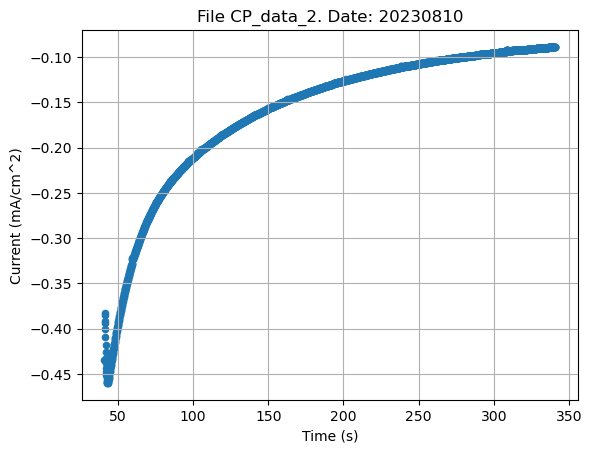

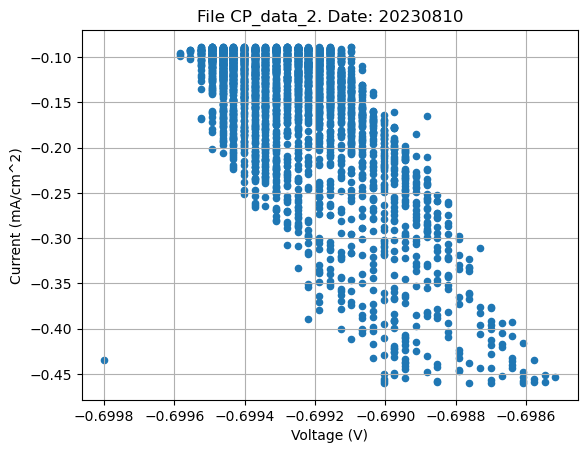

In [23]:
WO3_ITO_20230717_H_analysis()

## 20230821

###  electrochromic_setup_test\test_1_0p5_0p5_OCP

In [24]:
def electrochromic_setup_test_analysis_test_1_0p5_0p5_OCP_20230821():
    date = "20230821"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230821\20230821\electrochromic_setup_test\test_1_0p5_0p5_OCP"
    
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CV_1_file = os.path.join(current_folder, "CV_1.txt")
    OCP_1_file =  os.path.join(current_folder, "OCP_1.txt")
    #OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CV_1_df = pd.read_csv(CV_1_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    #OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(CV_1_df)
    print(OCP_1_df)
    
    #calculate current density
    
    CV_1_df["current"] = CV_1_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CV_1_df.plot.scatter(x, y, grid =True)
    plt.title(f"File test_1_0p5_0p5_OCP/CV_1.txt. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "voltage"
    y = "current"
    CV_1_df.plot.scatter(x, y, grid =True)
    plt.title(f"File test_1_0p5_0p5_OCP/OCP_1.txt. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()

           time   voltage       current
0     37.999232  0.170959  2.593994e-08
1     38.096888  0.173492  3.845215e-08
2     38.194544  0.176514  4.577637e-08
3     38.292200  0.178223  5.401611e-08
4     38.389856  0.180695  4.635620e-08
..          ...       ...           ...
815  117.588872  0.158691  2.923584e-07
816  117.686528  0.161346  2.822876e-07
817  117.784184  0.164185  2.795410e-07
818  117.881840  0.166565  2.752686e-07
819  117.979496  0.168884  2.792358e-07

[820 rows x 3 columns]
         time   voltage
0   11.905924  0.168365
1   12.905924  0.168396
2   13.905924  0.168396
3   14.905924  0.168427
4   15.905924  0.168457
5   16.905924  0.168457
6   17.905924  0.168488
7   18.905924  0.168518
8   19.905924  0.168518
9   20.905924  0.168549
10  21.905924  0.168579
11  22.905924  0.168579
12  23.905924  0.168610
13  24.905924  0.168640
14  25.905924  0.168671
15  26.905924  0.168671
16  27.905924  0.168701
17  28.905924  0.168732
18  29.905924  0.168732
19  30.905924  0

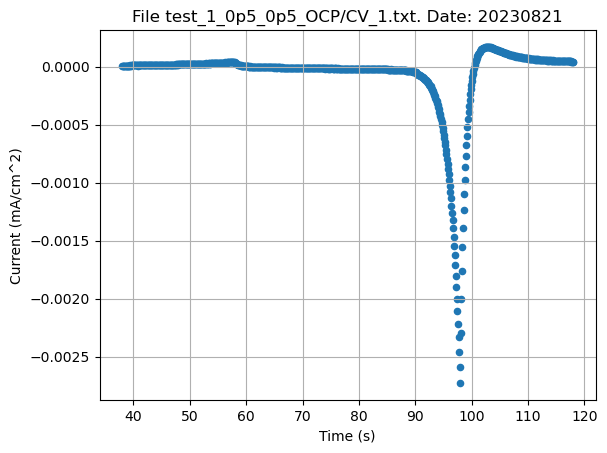

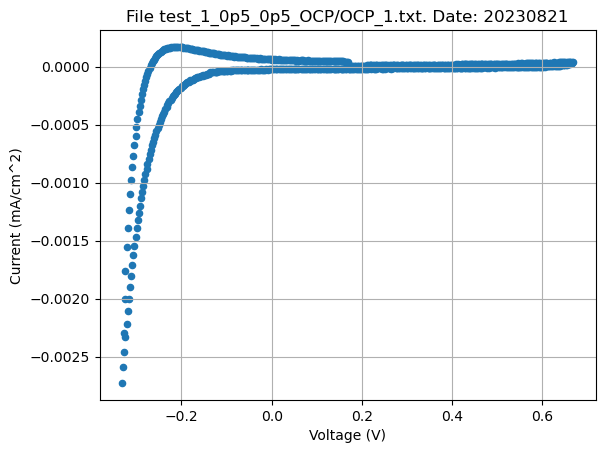

In [25]:
electrochromic_setup_test_analysis_test_1_0p5_0p5_OCP_20230821()

### electrochromic_setup_test\test_2_1_0p5_OCP

In [26]:
class PotentiostatFile:
        def __init__(self, file_path, type_of_file, date):
            self.file_path = file_path
            self.type_of_file = type_of_file
            self.column_labels = self._get_column_labels(type_of_file)
            self.column_names = self._get_column_names(type_of_file)
            self.dataframe = self._read_file(file_path, self.column_names)
            self.data_processing()
            self.date = date
            
        
        def _get_column_labels(self, type_of_file):
            if type_of_file == "CV":
                return {"time": "Time (s)", "current": "Current (mA/cm^2)", "voltage": "Voltage (V)"}
            elif type_of_file == "CA":
                return {"time": "Time (s)", "current": "Current (mA/cm^2)", "voltage": "Voltage (V)"}
            elif type_of_file == "OCP":
                return {"time": "Time (s)", "voltage": "Voltage (V)"}
            else:
                raise ValueError("Unsupported file type.")
                
        def _get_column_names(self, type_of_file):
            column_names_CV =  ["time", "voltage", "current"] 
            column_names_CA = ["time", "voltage", "current"] 
            column_names_OCP = ["time", "voltage"] 
            
            if type_of_file == "CV":
                return column_names_CV
            elif type_of_file == "CA":
                return column_names_CA
            elif type_of_file == "OCP":
                return column_names_OCP
            else:
                raise ValueError("Unsupported file type.")
        
        def _read_file(self, file_path, column_labels):
            print(self.column_names)
            return pd.read_csv(file_path, sep="\t", names=self.column_names, header=0)
            
        def get_filename(self):
            return self.file_path.split('/')[-1]
    
        def time_vs_current_analysis(self):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "current"
            self.dataframe.plot.scatter(x, y, grid=True)
            plt.title(f"File {basename}. Date: {self.date}")
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            plt.show()
            
        def time_vs_voltage_analysis(self):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "voltage"
            self.dataframe.plot.scatter(x, y, grid=True)
            plt.title(f"File {basename}. Date: {self.date}")
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            plt.show()
    
        def voltage_vs_current_analysis(self):
            basename = os.path.basename(self.file_path)
            x = "voltage"
            y = "current"
            self.dataframe.plot.scatter(x, y, grid=True)
            plt.title(f"File {basename}. Date: {self.date}")
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            plt.show()
            
        def get_dataframe(self):
            return self.dataframe
            
        def data_processing(self):
            if self.type_of_file == "CV" or self.type_of_file == "CA":
                self.calculate_current_density()
            
        def calculate_current_density(self):
            #calculate current density
            ito_area = 2.5*2.5 #cm**2
            df = self.dataframe
            df["current"] = df["current"] / ito_area * 1000 #to change it to mA/cm**2
            df["current"] = df["current"] / ito_area * 1000 #to change it to mA/cm**2

In [27]:
def electrochromic_setup_test_analysis_test_2_1_0p5_OCP_20230821():

    import pandas as pd

        
    date = "20230821"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230821\20230821\electrochromic_setup_test\test_2_1_0p5_OCP"
    
    CV_2_file = os.path.join(current_folder, "CV_2.txt")
    CV_2_b_file = os.path.join(current_folder, "CV_2_b.txt")
    OCP_1_file =  os.path.join(current_folder, "OCP_1.txt")
    OCP_1_b_file =  os.path.join(current_folder, "OCP_1_b.txt")
    

    #read files
    CV_2 =  PotentiostatFile(file_path = CV_2_file, type_of_file = "CV", date = date) 
    CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV", date = date ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date ) 
    OCP_1_b = PotentiostatFile( file_path = OCP_1_b_file, type_of_file = "OCP", date = date  ) 

    #print dataframes
    print(CV_2.dataframe)
    print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_1_b.dataframe)
    
    

    def time_vs_current_analysis(df, filename, date , column_labels):
        #filename
        basename = os.path.basename(filename)
        #CA_2 plot time vs current
        x = "time"
        y = "current"
        df.plot.scatter(x, y, grid =True)
        plt.title(f"File {basename} . Date: {date}")
        plt.xlabel(column_labels[x])
        plt.ylabel(column_labels[y])
        plt.show()

    def voltage_vs_current_analysis(df, filename, date, column_labels):
        #filename
        basename = os.path.basename(filename)
        #CA_2 plot time vs current
        x = "voltage"
        y = "current"
        df.plot.scatter(x, y, grid =True)
        plt.title(f"File {basename}. Date: {date}")
        plt.xlabel(column_labels[x])
        plt.ylabel(column_labels[y])
        plt.show()
        
    #Analysis
    CV_2.time_vs_current_analysis()
    CV_2.voltage_vs_current_analysis()

    CV_2_b.time_vs_current_analysis()
    CV_2_b.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_1_b.time_vs_voltage_analysis()
    
    
    

['time', 'voltage', 'current']
['time', 'voltage', 'current']
['time', 'voltage']
['time', 'voltage']
            time   voltage   current
0      30.496931  0.028046  0.000758
1      30.619001  0.029990  0.000617
2      30.741071  0.032907  0.000852
3      30.863141  0.034628  0.001133
4      30.985211  0.037787  0.001116
...          ...       ...       ...
1225  180.032681  0.015256  0.130469
1226  180.154751  0.018207  0.130156
1227  180.276821  0.020349  0.129531
1228  180.398891  0.022717  0.129609
1229  180.520961  0.025647  0.128984

[1230 rows x 3 columns]
            time   voltage   current
0     254.256077 -0.425018  0.020039
1     254.378147 -0.421387  0.035156
2     254.500217 -0.419434  0.044570
3     254.622287 -0.418091  0.051219
4     254.744357 -0.414642  0.056664
...          ...       ...       ...
1225  403.791827 -0.436798  2.431250
1226  403.913897 -0.434204  2.431250
1227  404.035967 -0.431641  2.431250
1228  404.158037 -0.429688  2.432031
1229  404.280107 -0.42

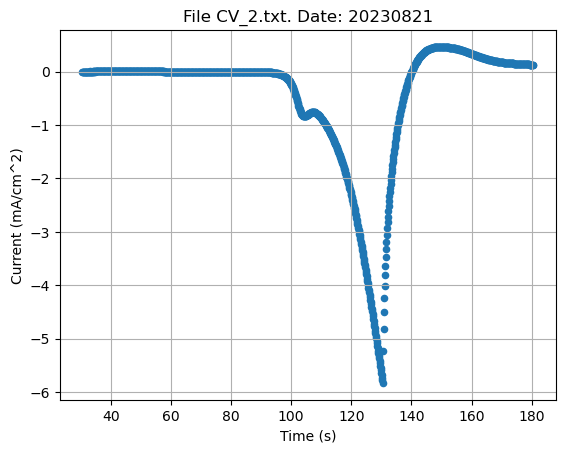

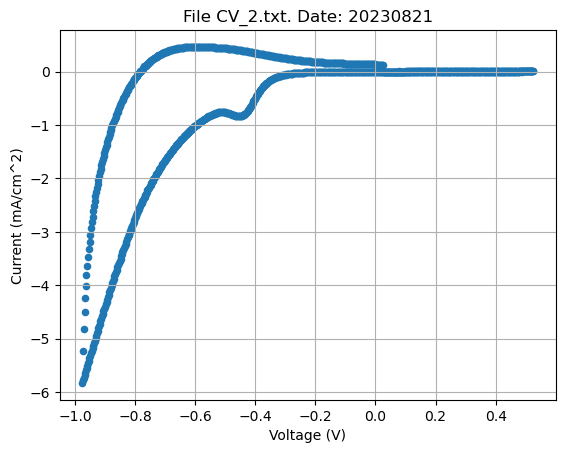

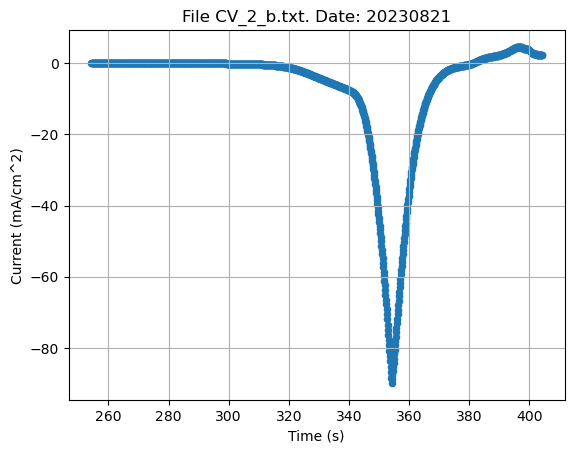

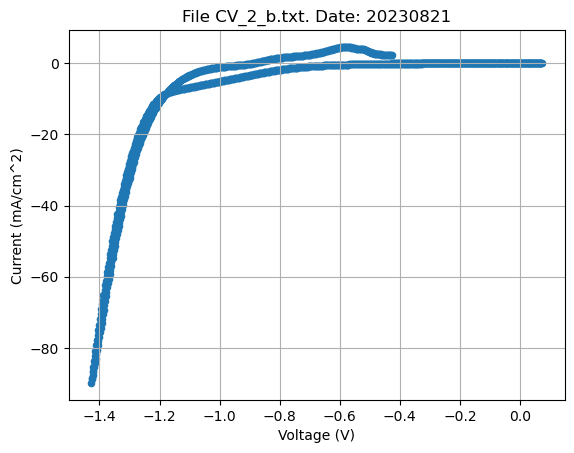

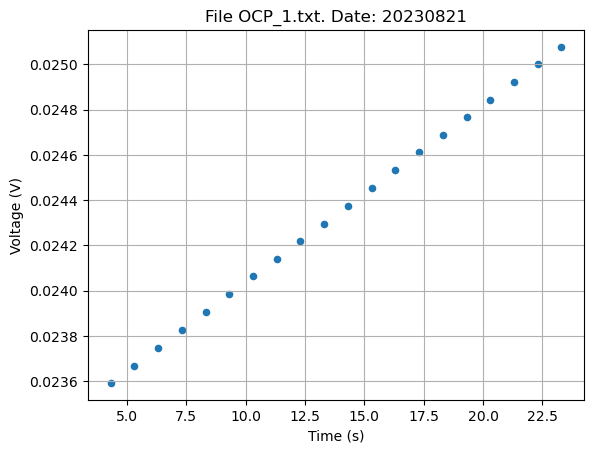

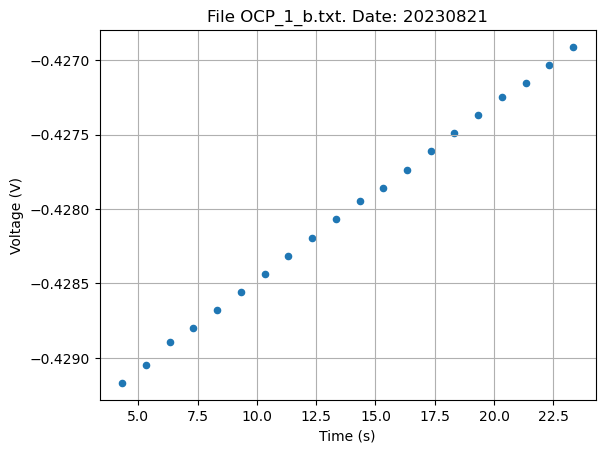

In [28]:
electrochromic_setup_test_analysis_test_2_1_0p5_OCP_20230821()

In [30]:
## 20230906

In [ ]:
### EC_measurement_WO3_in_H2SO4_1M_1

In [ ]:
def EC_measurement_WO3_in_H2SO4_1M_1():
    
    date = "20230821"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    electrochromic_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\electrochromic_data"
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2.txt")
    CV_2_b_file = os.path.join(electrochromic_data_folder, "CV_2_b.txt")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1.txt")
    OCP_1_b_file =  os.path.join(electrochromic_data_folder, "OCP_1_b.txt")

    optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\optical_data"
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2.txt")
    CV_2_b_file = os.path.join(electrochromic_data_folder, "CV_2_b.txt")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1.txt")
    OCP_1_b_file =  os.path.join(electrochromic_data_folder, "OCP_1_b.txt")
    
    #read files
    CV_2 =  PotentiostatFile(file_path = CV_2_file, type_of_file = "CV", date = date) 
    CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV", date = date ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date ) 
    OCP_1_b = PotentiostatFile( file_path = OCP_1_b_file, type_of_file = "OCP", date = date  ) 

    #print dataframes
    print(CV_2.dataframe)
    print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_1_b.dataframe)
    

    def time_vs_current_analysis(df, filename, date , column_labels):
        #filename
        basename = os.path.basename(filename)
        #CA_2 plot time vs current
        x = "time"
        y = "current"
        df.plot.scatter(x, y, grid =True)
        plt.title(f"File {basename} . Date: {date}")
        plt.xlabel(column_labels[x])
        plt.ylabel(column_labels[y])
        plt.show()

    def voltage_vs_current_analysis(df, filename, date, column_labels):
        #filename
        basename = os.path.basename(filename)
        #CA_2 plot time vs current
        x = "voltage"
        y = "current"
        df.plot.scatter(x, y, grid =True)
        plt.title(f"File {basename}. Date: {date}")
        plt.xlabel(column_labels[x])
        plt.ylabel(column_labels[y])
        plt.show()
        
    #Analysis
    CV_2.time_vs_current_analysis()
    CV_2.voltage_vs_current_analysis()

    CV_2_b.time_vs_current_analysis()
    CV_2_b.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_1_b.time_vs_voltage_analysis()

## 20230907

In [33]:
### wo3_film_continuous_electrodeposition_A

In [34]:
def wo3_film_continuous_electrodeposition_A_20230907():
    
    date = "20230907"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    electrochromic_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230907\20230907\electrodeposition_WO3_thin_films_onto_ITO_A\wo3_film_continuous_electrodeposition_A"
    
    #CV_2_file = os.path.join(electrochromic_data_folder, "CV_2.txt")
    CA_2_file = os.path.join(electrochromic_data_folder, "CA_2")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")

    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\optical_data"

    
    #read files
    CA_2 =  PotentiostatFile(file_path = CA_2_file, type_of_file = "CA", date = date) 
    #CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV", date = date ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date  ) 

    #print dataframes
    print(CA_2.dataframe)
    #print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_3.dataframe)
    
    
    #Analysis
    CA_2.time_vs_current_analysis()
    CA_2.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_3.time_vs_voltage_analysis()

['time', 'voltage', 'current']
['time', 'voltage']
['time', 'voltage']
            time   voltage     current
0      19.910790 -0.699585 -119.320312
1      20.010790 -0.699463 -123.250000
2      20.110790 -0.699524 -122.046875
3      20.210790 -0.699768 -122.468750
4      20.310790 -0.699432 -122.960937
...          ...       ...         ...
5995  619.410788 -0.699768   -8.596875
5996  619.510788 -0.699738   -8.600000
5997  619.610788 -0.699341   -8.596875
5998  619.710788 -0.698944   -8.597656
5999  619.810788 -0.699860   -8.600781

[6000 rows x 3 columns]
               time   voltage
2.743758   0.629272  0.629578
3.743758   0.629272       NaN
4.743758   0.629272       NaN
5.743758   0.629272       NaN
6.743758   0.629272       NaN
7.743758   0.629272       NaN
8.743758   0.629272       NaN
9.743758   0.629272       NaN
10.743758  0.629578       NaN
11.743758  0.629578       NaN
12.743758  0.629578       NaN
13.743758  0.629578       NaN
14.743758  0.629578       NaN
15.743758  0.629

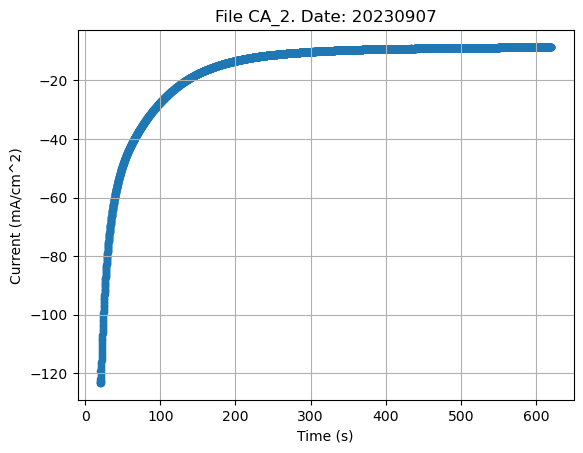

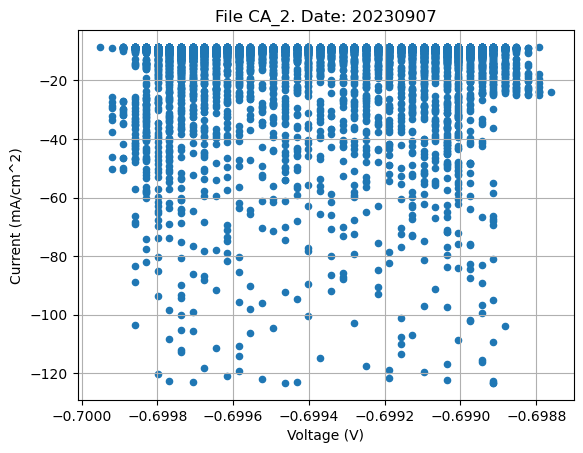

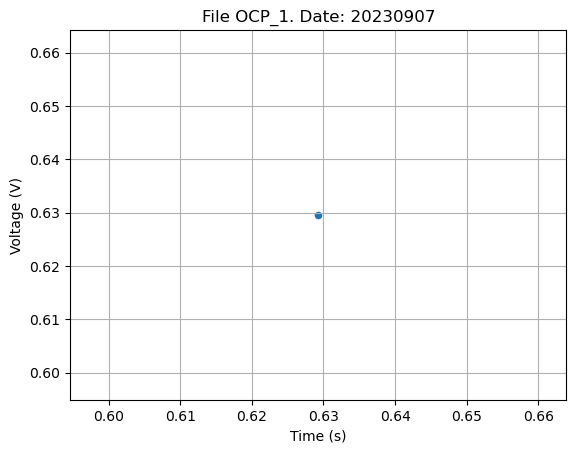

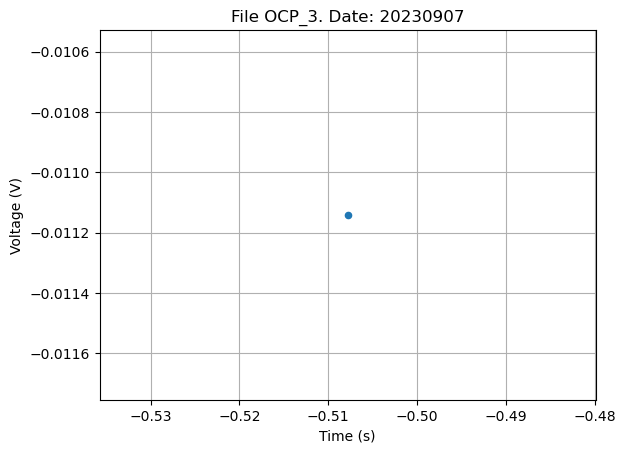

In [35]:
wo3_film_continuous_electrodeposition_A_20230907()

In [ ]:
### wo3_film_continuous_electrodeposition_B